# Projet Airlines

Je vais faire ici analyse plus temporel pour comprendre mes choix à un instant t <br>
C'est pour ça que je vais faire d'abord :
## Journée du mercredi 
### Prise en main du dataset et début d'exploration

J'ai remarqué que dans le le csv était en une seule colonne d'où le delimiter

In [1]:
import pandas as pd
#début d'exploration des données sur le csv il y avait qu'une seule colonne d'où le delimiter 
data = pd.read_csv('Airline Passenger Satisfaction.csv', delimiter=';')
print(data.shape)
data.head()


(129880, 24)


,id,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


#### Remarque sur le code exécuté 

La taille du dataset (129880, 24) , beaucoup de colonne contenant des notes (potentiellement de 0 à 5), quelques infos sur le voyageur et répérage de la colonne target 

In [209]:
data.columns
#savoir le nom des colonnes exact pour pas faire de fautes

Index(['id', 'Satisfaction', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

#### Première étape : léger nettoyage 

Le dataset semble relativement propre mais premier reflexe regarder les valeurs nulles 

#### Remarque sur le code qui suit :
Pas énormément de valeurs donc pour un premier temps drop les lignes correspondantes et si le temps me le permet faire de l'inputation

In [2]:
#regarder si il y a des valeurs manquantes et suppression dans ce cas 
missing_values = data.isna()

missing_counts = missing_values.sum()

print('colonnes avec des valeurs manquantes :')
print(missing_counts[missing_counts > 0])

data = data.dropna()

colonnes avec des valeurs manquantes :
Arrival Delay in Minutes    393
dtype: int64


#### Remarque sur le code qui suit :
Dans un début de projet de data mon premier réflexe c'est d'explorer le dataset "un peu n'importe comment" pour voir ce que je peux découvrir donc je formule des hypothéses comme par exemple est ce que la Classe du passager influe sur sa Satisfaction ?

/tmp/ipykernel_341341/945006863.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped_pct = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


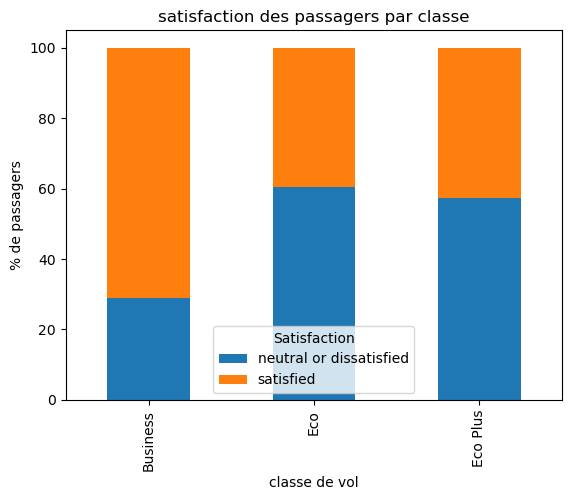

In [211]:
import matplotlib.pyplot as plt
grouped = data.groupby(['Class', 'Satisfaction'])['Satisfaction'].count()
grouped_pct = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# afficher les résultats dans un histogramme
grouped_pct.unstack().plot(kind='bar', stacked=True)

# ajouter des titres et des labels d'axes
plt.title('satisfaction des passagers par classe')
plt.xlabel('classe de vol')
plt.ylabel('% de passagers')

# afficher l'histogramme
plt.show()

#### Remarque sur le code qui suit :
J'allais faire ça sur plusieurs données catégorielles c'est alors que je me suis dit autant faire une boucle
#### Remarque sur le résultat du qui suit :
Résultats pas très intérressant parce que j'ai fait par rapport à la Classe j'ai un peu perdu l'objectif de vue mais ça ma permit de apréhender un peu plus le dataset 

Rectification un peu plus tard dans le notebook 

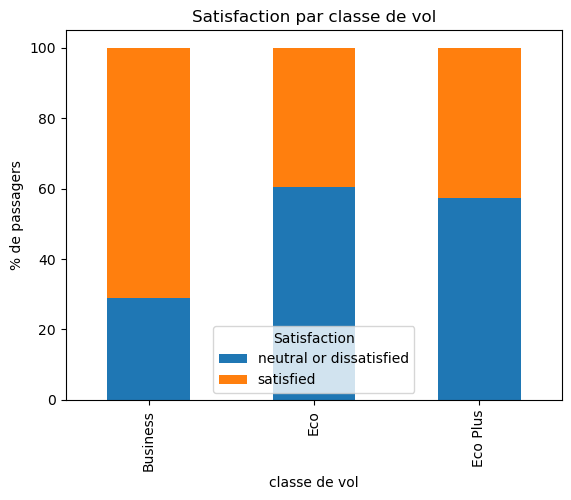

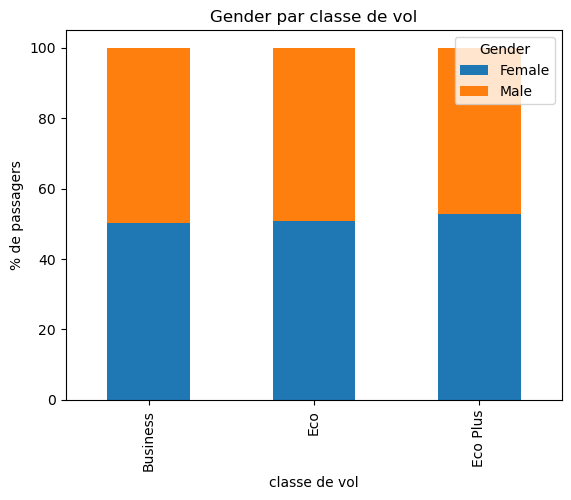

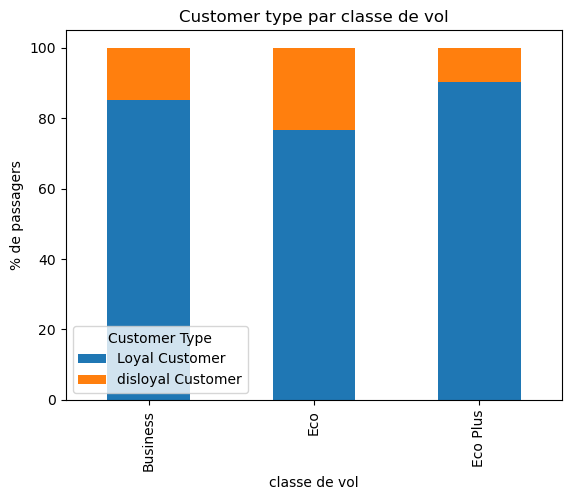

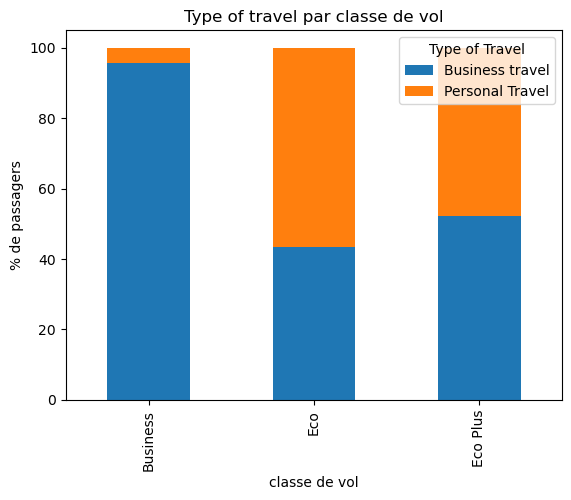

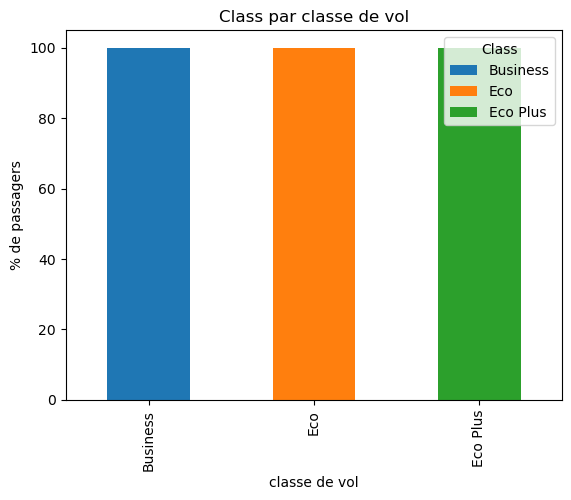

In [213]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
#sélection des données non numériques 
cat_cols = data.select_dtypes(include=['object']).columns
def format_percent(x, pos):
    return f'{x:.1f}%'

for col in cat_cols:
    counts = data[col].value_counts()

    grouped_counts = data.groupby('Class')[col].value_counts()
    
    # calcul de pourcentage
    grouped_pct = (grouped_counts / grouped_counts.groupby(level=0).sum()) * 100

    grouped_pct.unstack().plot(kind='bar', stacked=True)

    plt.title(f'{col.capitalize()} par classe de vol')
    plt.xlabel('classe de vol')
    plt.ylabel('% de passagers')
    def hover_formatter(val, pos):
        return format_percent(val, pos)
    formatter = FuncFormatter(hover_formatter)
    plt.format_data_labels = formatter
    plt.show()


#### Remarque sur le code qui suit :
Aprés avoir travaillé sur les données catégorielles calcul de la moyenne pour chaque colonne numériques 
#### Remarque sur le résultat code qui suit :
J'ai pu voir quelques informations intérresante sur les moyennes les plus hautes ou les plus basses

In [214]:
# Boucle sur chaque colonne numérique 
for col in data.columns:
    # vérifier si la colonne contient des nombres
    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
        moyenne = data[col].mean()
        print(f"La moyenne de la colonne '{col}' est : {moyenne}")


La moyenne de la colonne 'id' est : 64958.33516878142
La moyenne de la colonne 'Age' est : 39.42876118838185
La moyenne de la colonne 'Flight Distance' est : 1981.0089738738252
La moyenne de la colonne 'Seat comfort' est : 2.8385861128916416
La moyenne de la colonne 'Departure/Arrival time convenient' est : 2.990277016225567
La moyenne de la colonne 'Food and drink' est : 2.852023755280453
La moyenne de la colonne 'Gate location' est : 2.990377412404334
La moyenne de la colonne 'Inflight wifi service' est : 3.2491601473506995
La moyenne de la colonne 'Inflight entertainment' est : 3.3837450863793275
La moyenne de la colonne 'Online support' est : 3.519967255400156
La moyenne de la colonne 'Ease of Online booking' est : 3.4721709515240913
La moyenne de la colonne 'On-board service' est : 3.4651432190104026
La moyenne de la colonne 'Leg room service' est : 3.4861182975897194
La moyenne de la colonne 'Baggage handling' est : 3.6954597758848378
La moyenne de la colonne 'Checkin service' es

#### Remarque sur le code qui suit :
Le résultat m'a rappelé que j'étais pas sûr du min et du max des notes donc vérification

In [215]:
# calcul min et max de chaque colonne numérique

# sélection des colonnes numériques
num_cols = data.select_dtypes(include=['float', 'int']).columns

for col in num_cols:
    min_val = data[col].min()
    max_val = data[col].max()

    print(f'{col.capitalize()}: min = {min_val}, max = {max_val}')


Id: min = 1, max = 129880
Age: min = 7, max = 85
Flight distance: min = 50, max = 6951
Seat comfort: min = 0, max = 5
Departure/arrival time convenient: min = 0, max = 5
Food and drink: min = 0, max = 5
Gate location: min = 0, max = 5
Inflight wifi service: min = 0, max = 5
Inflight entertainment: min = 0, max = 5
Online support: min = 0, max = 5
Ease of online booking: min = 0, max = 5
On-board service: min = 0, max = 5
Leg room service: min = 0, max = 5
Baggage handling: min = 1, max = 5
Checkin service: min = 0, max = 5
Cleanliness: min = 0, max = 5
Online boarding: min = 0, max = 5
Departure delay in minutes: min = 0, max = 1592
Arrival delay in minutes: min = 0.0, max = 1584.0


#### Remarque sur le code qui suit :
Les moyennes sont intérressante mais pas suffisante donc j'ai groupby par Satisfaction pour savoir quel pourrait être les colonnes qui peuvent potentiellemnt influer sur la Satisfaction
#### Remarque sur le résultat code qui suit :
J'ai émis l'hypothése que Inflight entertainment, Online support et Ease of Online booking était les trois notes qui pouvait le plus influer sur la satisfaction 

In [216]:
# grouper le dataset par la colonne satisfaction et calculer la moyenne des colonnes numériques
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
groupby_satisfaction = data.groupby('Satisfaction')
mean_by_satisfaction = groupby_satisfaction[num_cols].mean()

print('Moyennes par satisfaction:')
print(mean_by_satisfaction)



Moyennes par satisfaction:
                                   id        Age  Flight Distance  \
Satisfaction                                                        
neutral or dissatisfied  64402.630595  37.468373      2025.202833   
satisfied                65417.789848  41.049604      1944.469640   

                         Seat comfort  Departure/Arrival time convenient  \
Satisfaction                                                               
neutral or dissatisfied      2.467315                           3.016517   
satisfied                    3.145552                           2.968582   

                         Food and drink  Gate location  Inflight wifi service  \
Satisfaction                                                                    
neutral or dissatisfied        2.660609       3.008003               2.919922   
satisfied                      3.010285       2.975805               3.521374   

                         Inflight entertainment  Online support  \

#### Remarque sur le code qui suit :
Les chiffres c'est bien mais les graphiques c'est mieux (en tout cas pour visualiser) et j'ai rajouté la médiane pour plus d'informations
#### Remarque sur le résultat code qui suit :
Bon les couleurs pas top (c'est relativement moche) un peu trop de données différentes donc un peu dur à lire mais un peu de "confirmation" sur les résultats précédent plus avec Seat Comfort qui peut influencer 
#### Clairement à améliorer : 
Faire une boîte à moustache peut-être plus tard si j'ai le temps 

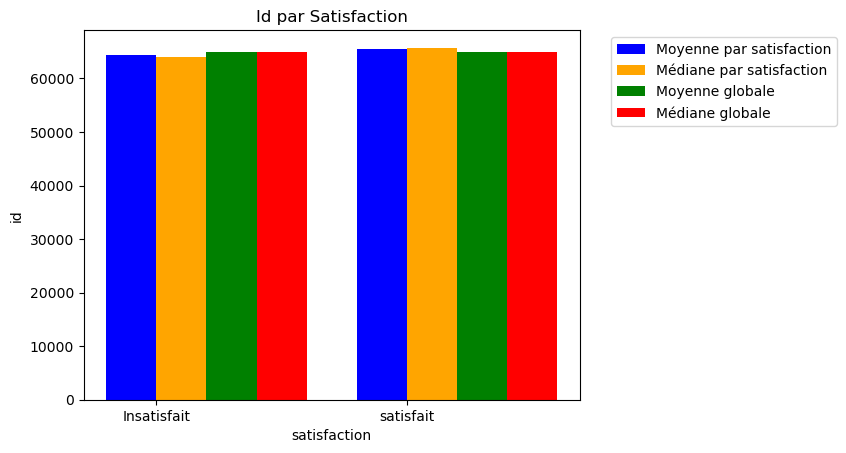

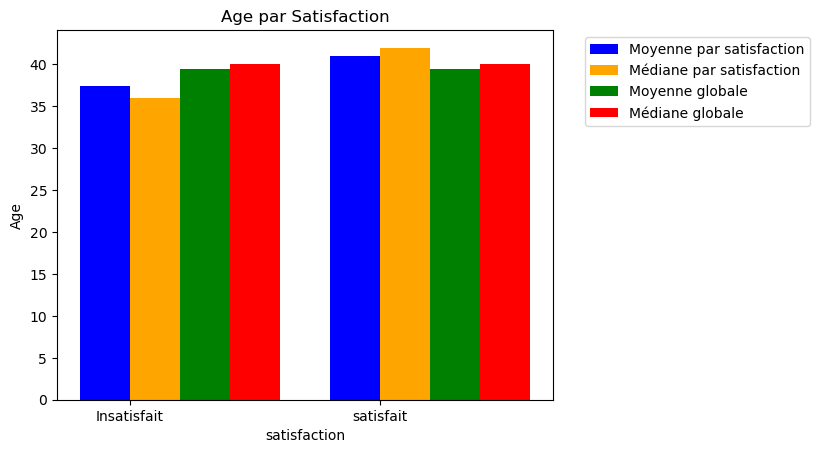

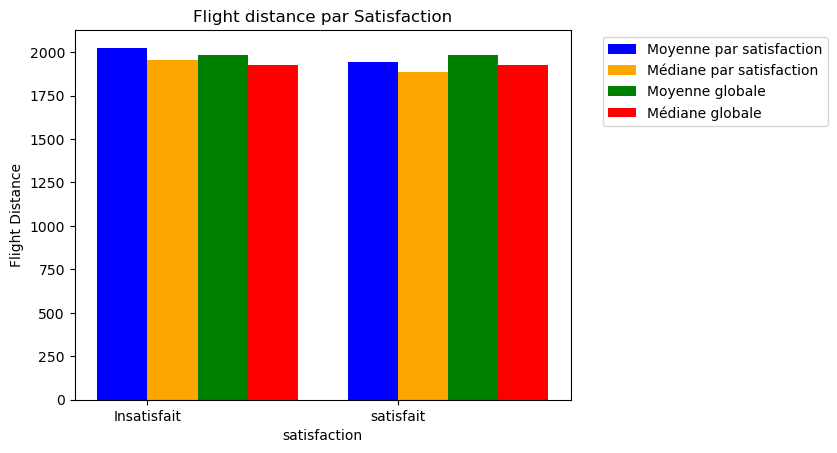

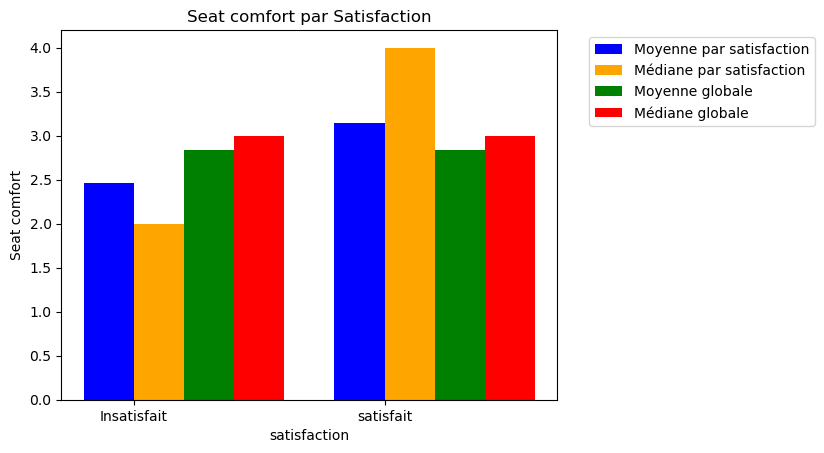

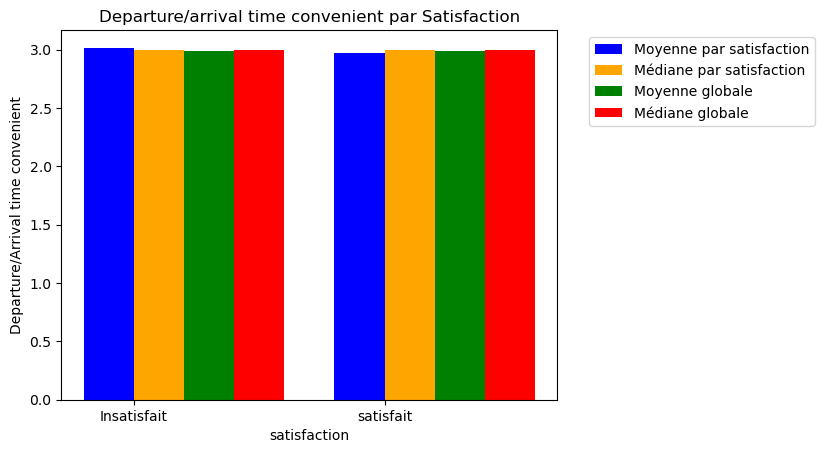

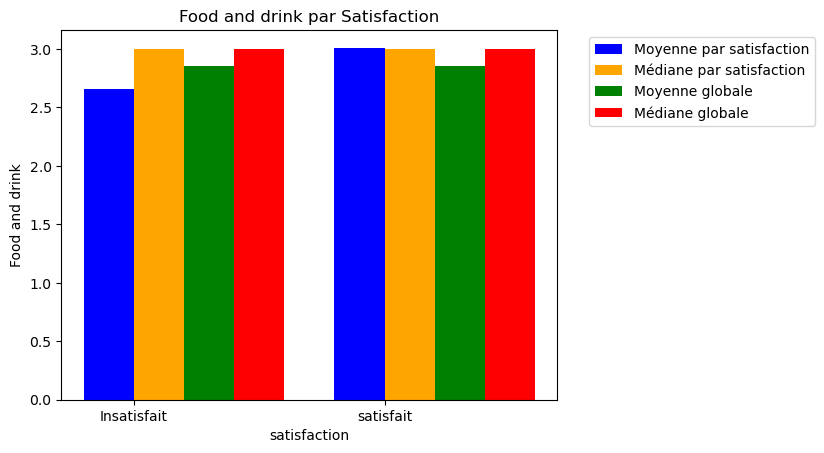

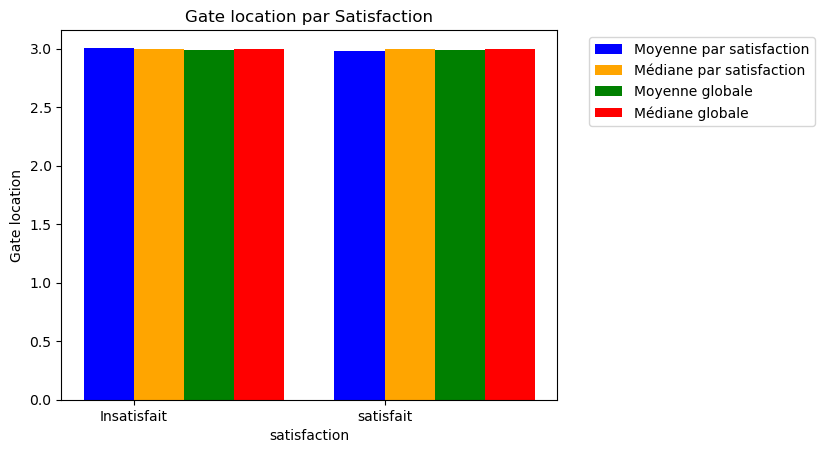

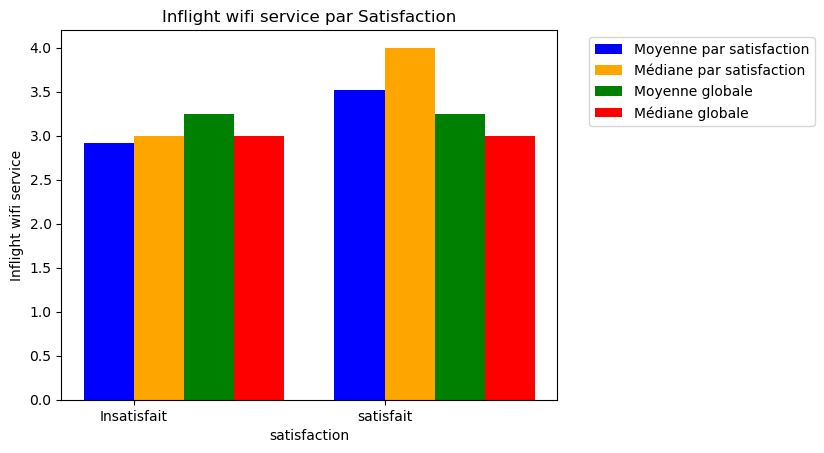

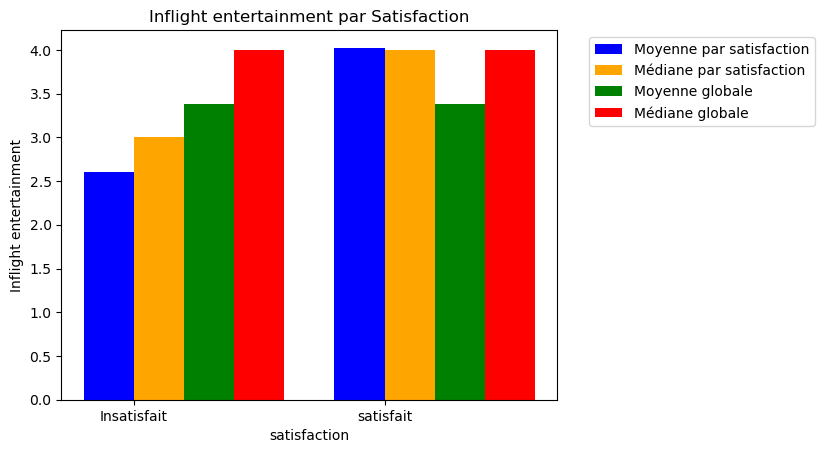

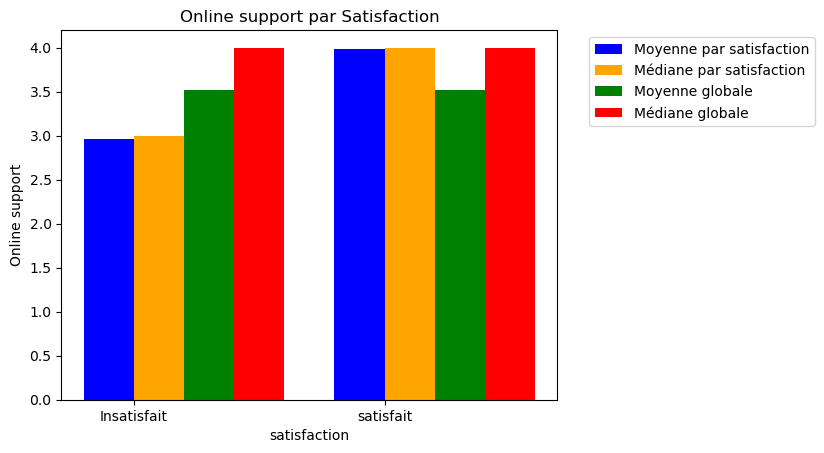

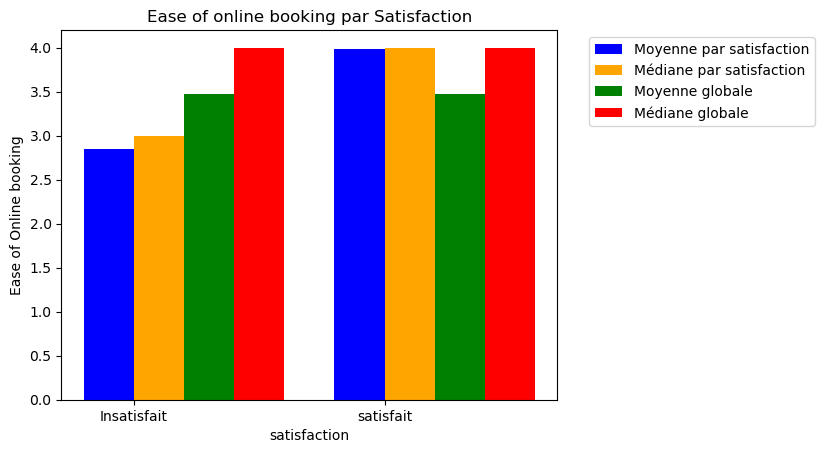

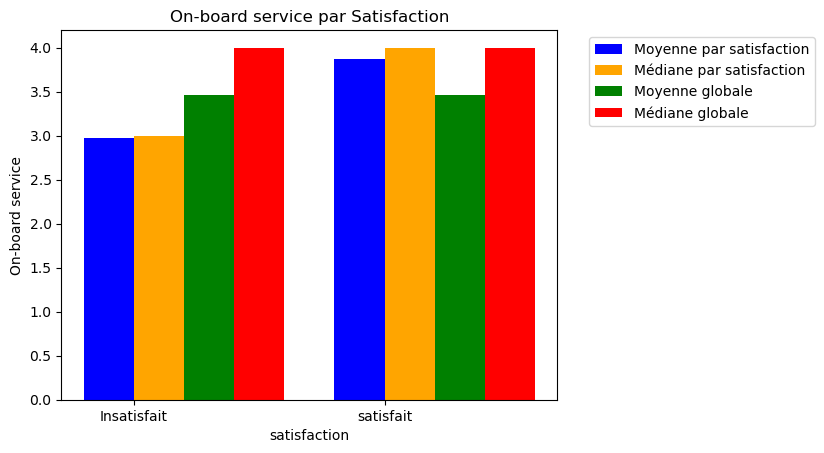

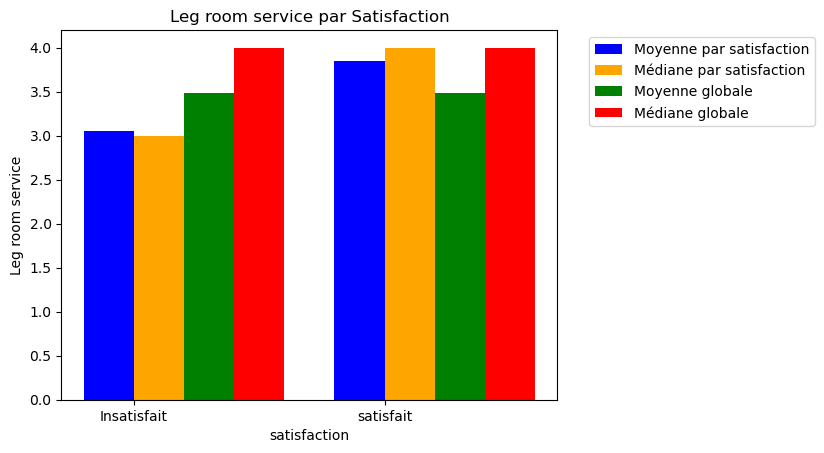

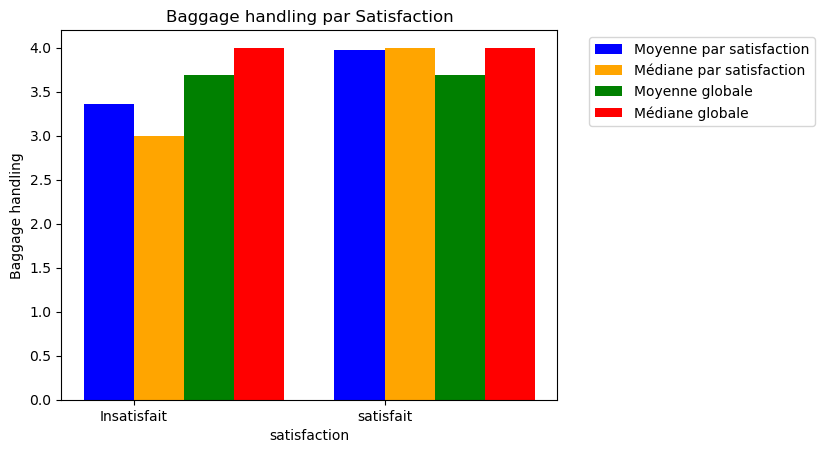

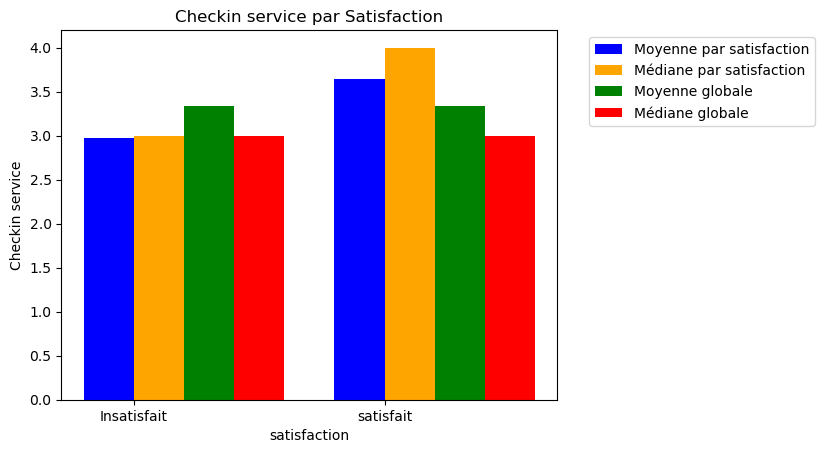

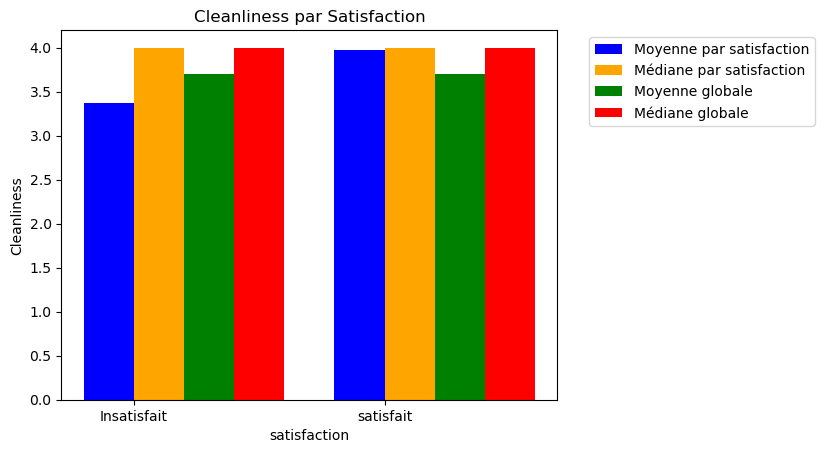

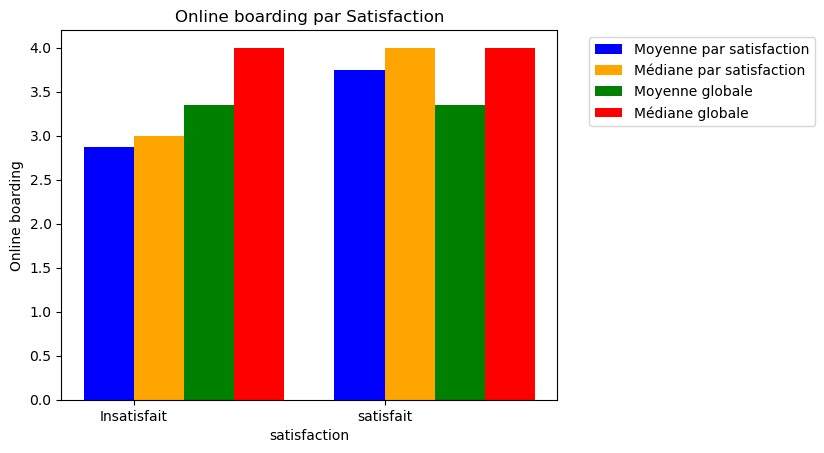

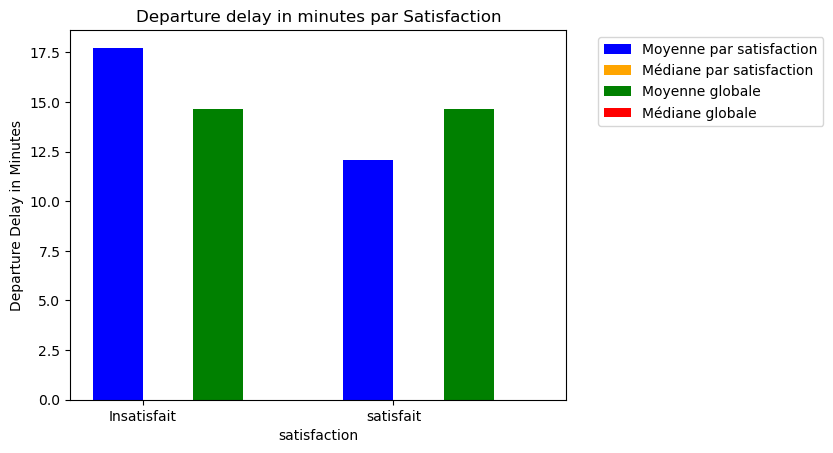

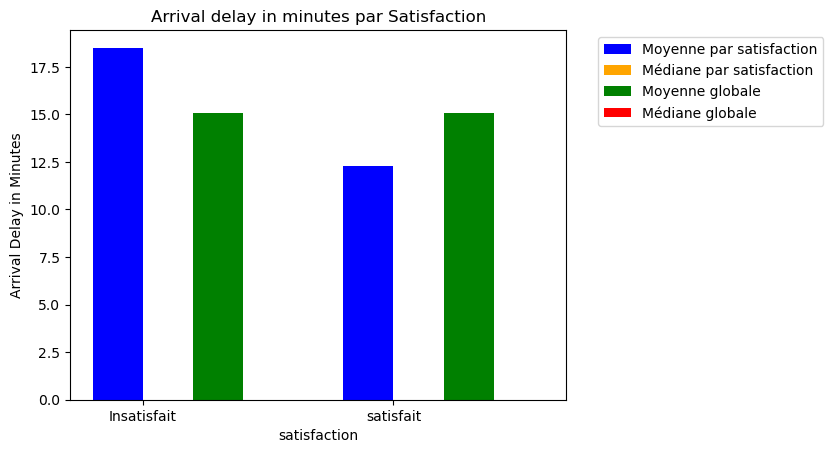

In [217]:
import matplotlib.pyplot as plt
import numpy as np

# grouper le dataset par la colonne satisfaction et calculer la moyenne et la médiane des colonnes numériques
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
groupby_satisfaction = data.groupby('Satisfaction')
mean_by_satisfaction = groupby_satisfaction[num_cols].mean()
median_by_satisfaction = groupby_satisfaction[num_cols].median()
mean_global = data[num_cols].mean()
median_global = data[num_cols].median()

for col in num_cols:
    fig, ax = plt.subplots()
    ax.set_title(f'{col.capitalize()} par Satisfaction')
    
    # le bazar pour afficher
    bar_width = 0.2
    r0 = np.arange(2)
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    r4 = [x + bar_width for x in r3]
    ax.bar(r1, mean_by_satisfaction[col], color='blue', width=bar_width, label='Moyenne par satisfaction')
    ax.bar(r2, median_by_satisfaction[col], color='orange', width=bar_width, label='Médiane par satisfaction')
    ax.bar(r3, [mean_global[col], mean_global[col]], color='green', width=bar_width, label='Moyenne globale')
    ax.bar(r4, [median_global[col], median_global[col]], color='red', width=bar_width, label='Médiane globale')
    
    # les étiquetes
    ax.set_xlabel('satisfaction')
    ax.set_ylabel(col)
    ax.set_xticks([r + 0.5 * bar_width for r in range(2)])
    ax.set_xticklabels(['Insatisfait', 'satisfait'])
    
    # casse c****le de légende
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
plt.show()


## Début de ML
Ayant jamais trop fait par moi-même de pipeline et ML dans les précédent projet j'ai été relativement vite sur l'exploration de données pour me concentrer déja sur la pipeline
### Pipeline et premier entrainement
#### Remarque sur le code qui suit :
Choix de pour le test faire qu'un seul modèle avec un RamdomForestClassifier et pour le prerpocessing de StandardScaler et OneHotEncoder

De même pour la métrique choix un peu au hasard de l'accuracy 
#### Remarque sur le résultat code qui suit :
Très bon score assez étonné même mais relativement bon score 

In [224]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

#premier test de pipeline

# séparation des colonnes numériques et catégorielles
num_cols = ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
            'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 
            'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 
            'Arrival Delay in Minutes']
cat_cols = [ 'Gender', 'Customer Type', 'Type of Travel', 'Class']

# création de la pipeline de transformation des données
preprocessor = ColumnTransformer(
    transformers=[
        #si jamais il y a besoin imputer des données :
            #('num', simpleImputer(strategy='median'), num_cols), 
        
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ])

# ajout du classifieur Random Forest à la pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])
                      
# séparation de la target
X = data.drop('Satisfaction', axis=1)
y = data['Satisfaction']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# entraînement et évaluation
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(f"accuracy: {accuracy}")


accuracy: 0.9589543594099931


## Journée de jeudi 
### Début de recherche sur plusieurs modèle et Hyperparamétres 
#### Remarque sur le code qui suit :
Test de valeurs de trois modèles différents avec plusieurs paramêtres différents 
#### Remarque sur le résultat code qui suit :
Toujours étonnées des différents scores aussi élévés et le RamdomForest semble le plus efficace faire gaffe à l'overfitting néanmoins

In [264]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#on test avec gridsearch et certains paramètres 

num_cols = ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
            'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 
            'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 
            'Arrival Delay in Minutes']
cat_cols = [ 'Gender', 'Customer Type', 'Type of Travel', 'Class']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(), cat_cols)])

models = {
    'rf': RandomForestClassifier(),
    'dt': DecisionTreeClassifier(),
    'lr': LogisticRegression()
}

# définition de la grille de recherche d'hyperparamètres un peu avec des nombres au hasards
param_grid = {
    'rf': {'classifier__n_estimators': [20, 30, 50, 100, 200,1000]},
    'dt': {'classifier__max_depth': [None, 5, 10,20,40,80]},
    'lr': {'classifier__C': [0.1, 1, 10]}
}

pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('classifier', model)])

#recherche d'hyperparamétres les plus adaptés 
for name, pipeline in pipelines.items():
    grid = GridSearchCV(pipeline, param_grid[name], cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"Meilleurs paramètres pour le modèle {name}: {grid.best_params_}")
    print(f"score sur le jeu d'entraînement : {grid.score(X_train, y_train):.3f}")
    print(f"score sur le jeu de test : {grid.score(X_test, y_test):.3f}")


Meilleurs paramètres pour le modèle rf: {'classifier__n_estimators': 1000}
score sur le jeu d'entraînement : 1.000
score sur le jeu de test : 0.958
Meilleurs paramètres pour le modèle dt: {'classifier__max_depth': 20}
score sur le jeu d'entraînement : 0.987
score sur le jeu de test : 0.942
Meilleurs paramètres pour le modèle lr: {'classifier__C': 0.1}
score sur le jeu d'entraînement : 0.836
score sur le jeu de test : 0.834


### Recherche de features inmportantes 
#### Remarque sur le code qui suit :
Utilisation car déjà dans un autre projet la fonction rfe pour avoir résultats des features importantes 
#### Remarque sur le résultat code qui suit :
Bon déjà erreur qui m'a pris pas mal de temps à essayer de corriger(sans succés mais je comprenais l'erreur ) et résultats pas du tout en adéquation avec mon analyses et par rapport aux autres de la promo

Je vais utiliser plus tard une autre fonction
#### Clairement à améliorer
La sélection de features n'a absolument pas été faite !!! Un peu tard quand je m'en suis rendu compte mais erreur à ne plus reproduire voir si j'ai le temps corriger plus tard mais l'ID à été garder dans les features 

In [265]:
from sklearn.feature_selection import RFE

# RFE pipeline
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=1000)
rfe = RFE(estimator=rf_model, n_features_to_select=1, step=1)
selector = rfe.fit(preprocessor.fit_transform(X_train), y_train)

# get feature rankings
rankings = selector.ranking_

# print feature rankings
for i in np.argsort(rankings):
    print(f"{X_train.columns[i]}: {rankings[i]}")
print(selector.ranking_)

Seat comfort: 1
Gender: 2
Customer Type: 3
Food and drink: 4
id: 5
Departure/Arrival time convenient: 6
Gate location: 7
Inflight wifi service: 8
Type of Travel: 9
On-board service: 10
Age: 11
Online boarding: 12


IndexError: index 24 is out of bounds for axis 0 with size 23

#### Remarque sur le code qui suit :
Tentative de faire du cross validation pour le score du modèleen utilisant les meuilleurs paramètres à chaque fois 
#### Remarque sur le résultat code qui suit :
Résultats nettement plus bas que l'accuracy au dessus !! 

In [236]:
from sklearn.model_selection import  cross_val_score

#on test avec gridsearch et certains paramètres 

num_cols = ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
            'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 
            'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 
            'Arrival Delay in Minutes']
cat_cols = [ 'Gender', 'Customer Type', 'Type of Travel', 'Class']


preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(), cat_cols)])

models = {
    'rf': RandomForestClassifier(),
    'dt': DecisionTreeClassifier(),
    'lr': LogisticRegression()
}

# définition de la grille de recherche d'hyperparamètres un peu avec des nombres au hasards
param_grid = {
    'rf': {'classifier__n_estimators': [1000]},
    'dt': {'classifier__max_depth': [80]},
    'lr': {'classifier__C': [0.1]}
}

pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('classifier', model)])

#recherche d'hyperparamétres les plus adaptés avec cross validation
for name, pipeline in pipelines.items():
    grid = GridSearchCV(pipeline, param_grid[name], cv=5, n_jobs=-1)
    scores = cross_val_score(grid, X, y, cv=5)
    print(f"score de validation croisée pour le modèle {name}: {scores.mean():.3f}")


/home/matthieu/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


score de validation croisée pour le modèle rf: 0.748
score de validation croisée pour le modèle dt: 0.712
score de validation croisée pour le modèle lr: 0.716


#### Remarque sur le code qui suit :
Remarque sur Stratified qui n'a pas été fait donc même code mais avec stratified
#### Remarque sur le résultat code qui suit :
Résultats plus acceptable déjà

In [239]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#on test avec gridsearch et certains paramètres 

num_cols = ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
            'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 
            'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 
            'Arrival Delay in Minutes']
cat_cols = [ 'Gender', 'Customer Type', 'Type of Travel', 'Class']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(), cat_cols)])

models = {
    'rf': RandomForestClassifier(),
}

# définition de la grille de recherche d'hyperparamètres un peu avec des nombres au hasards
param_grid = {
    'rf': {'classifier__n_estimators': [200]},
}

pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('classifier', model)])

#recherche d'hyperparamétres les plus adaptés avec cross validation
for name, pipeline in pipelines.items():
    grid = GridSearchCV(pipeline, param_grid[name], cv=StratifiedKFold(), n_jobs=-1)
    scores = cross_val_score(grid, X_test, y_test, cv=StratifiedKFold())
    print(f"score de validation croisée pour le modèle {name}: {scores.mean():.3f}")

score de validation croisée pour le modèle rf: 0.947


## Journée de Vendredi
Bon .... Suite à une erreur, correction de bugs un par un dans TOUT le notebook et ajout des Markdow pour rendre plus lisible
### Bonus : recherche de features importances
#### Remarque sur le résultat code qui suit :
On ne voit pas toutes les données mais il semble que Inflight Entertainement sort du lot conformément aux prédictions de l'analyse

In [240]:
#recherche d'hyperparamétres les plus adaptés avec cross validation
for name, pipeline in pipelines.items():
    grid = GridSearchCV(pipeline, param_grid[name], cv=StratifiedKFold(), n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"Meilleurs paramètres pour le modèle {name}: {grid.best_params_}")
    print(f"score sur le jeu d'entraînement : {grid.score(X_train, y_train):.3f}")
    print(f"score sur le jeu de test : {grid.score(X_test, y_test):.3f}")
    
    # calculer l'importance des features
    if name == 'rf':
        feature_importances = grid.best_estimator_.named_steps['classifier'].feature_importances_
        print("Importance des features :")
        for feature_name, importance in zip(num_cols + list(grid.best_estimator_.named_steps['preprocessor'].transformers_[1][1].get_feature_names(cat_cols)), feature_importances):
            print(f"{feature_name}: {importance:.4f}")

Meilleurs paramètres pour le modèle rf: {'classifier__n_estimators': 200}
score sur le jeu d'entraînement : 1.000
score sur le jeu de test : 0.958
Importance des features :
Age: 0.0295
Flight Distance: 0.0311
Seat comfort: 0.1268
Departure/Arrival time convenient: 0.0215
Food and drink: 0.0384
Gate location: 0.0186
Inflight wifi service: 0.0141
Inflight entertainment: 0.1817
Online support: 0.0636
Ease of Online booking: 0.0765
On-board service: 0.0388
Leg room service: 0.0351
Baggage handling: 0.0246
Checkin service: 0.0255
Cleanliness: 0.0256
Online boarding: 0.0350
Departure Delay in Minutes: 0.0139
Arrival Delay in Minutes: 0.0155
Gender_Female: 0.0213
Gender_Male: 0.0243
Customer Type_Loyal Customer: 0.0294
Customer Type_disloyal Customer: 0.0252
Type of Travel_Business travel: 0.0201
Type of Travel_Personal Travel: 0.0199
Class_Business: 0.0281
Class_Eco: 0.0136
Class_Eco Plus: 0.0022


/home/matthieu/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### Remarque sur le code qui suit :
On va les trier c'est mieux
#### Remarque sur le résultat code qui suit :
relativement proche de l'analyse faites au dessus 

In [242]:
forest = grid.best_estimator_.named_steps['classifier']
feature_names = grid.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

feature_importance = pd.Series({feature_names[i] : forest.feature_importances_[i] for i in range(len(forest.feature_importances_))})

feature_importance.sort_values(ascending=False)
print(feature_importance.sort_values(ascending=False))


num__Inflight entertainment               0.181685
num__Seat comfort                         0.126756
num__Ease of Online booking               0.076462
num__Online support                       0.063583
num__On-board service                     0.038753
num__Food and drink                       0.038439
num__Leg room service                     0.035051
num__Online boarding                      0.035044
num__Flight Distance                      0.031114
num__Age                                  0.029500
cat__Customer Type_Loyal Customer         0.029449
cat__Class_Business                       0.028146
num__Cleanliness                          0.025639
num__Checkin service                      0.025477
cat__Customer Type_disloyal Customer      0.025171
num__Baggage handling                     0.024632
cat__Gender_Male                          0.024327
num__Departure/Arrival time convenient    0.021501
cat__Gender_Female                        0.021348
cat__Type of Travel_Business tr

### Prédiction sur des test différents et aléatoires
#### Remarque sur les code qui suivent :
J'ai testé plusieurs valeurs possibles 
#### Remarque sur les résultats de code qui suivent :
J'ai un peu de tout avec effectivement inflight entertainement qui semble faire un peu plus bouger les choses 

In [246]:
best_model = grid.best_estimator_

# prédire les labels pour un nouvel ensemble de données
X_new = [[33, 'Female', 'Loyal Customer', 300, 'Personal Travel', 'Business',  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 15, 15]]
cols = ['Age', 'Gender', 'Customer Type', 'Flight Distance', 'Type of Travel', 'Class',  'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
X_new_data = pd.DataFrame(X_new, columns=cols)
y_pred = best_model.predict(X_new_data)


print(f'prédictions:\n{y_pred}')

prédictions:
['neutral or dissatisfied']


In [249]:
best_model = grid.best_estimator_

# prédire les labels pour un nouvel ensemble de données
X_new = [[33, 'Female', 'Loyal Customer', 300, 'Personal Travel', 'Eco Plus',  2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 15, 15]]
cols = ['Age', 'Gender', 'Customer Type', 'Flight Distance', 'Type of Travel', 'Class',  'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
X_new_data = pd.DataFrame(X_new, columns=cols)
y_pred = best_model.predict(X_new_data)


print(f'prédictions:\n{y_pred}')

prédictions:
['satisfied']


In [251]:
best_model = grid.best_estimator_

# prédire les labels pour un nouvel ensemble de données
X_new = [[33, 'Female', 'Loyal Customer', 300, 'Personal Travel', 'Eco',  2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 15, 15]]
cols = ['Age', 'Gender', 'Customer Type', 'Flight Distance', 'Type of Travel', 'Class',  'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
X_new_data = pd.DataFrame(X_new, columns=cols)
y_pred = best_model.predict(X_new_data)


print(f'prédictions:\n{y_pred}')

prédictions:
['satisfied']


#### Remarque sur les code qui suivent :
Je suis un programmeur donc par nature fainéants :) donc l'ordi va faire l'aléatoire à ma place au lieu de rentrer les valeurs à la main

In [253]:
import random

best_model = grid.best_estimator_

# définir les bornes pour les valeurs aléatoires
age_min, age_max = 7, 85
flight_dist_min, flight_dist_max = 50, 6950
delay_min, delay_max = 0, 1592

# générer les valeurs aléatoires pour chaque colonne
age = random.randint(age_min, age_max)
gender = random.choice(data['Gender'].unique())
customer_type = random.choice(data['Customer Type'].unique())
flight_distance = random.randint(flight_dist_min, flight_dist_max)
travel_type = random.choice(data['Type of Travel'].unique())
travel_class = random.choice(data['Class'].unique())
departure_delay = random.randint(delay_min, delay_max)
seat_comfort = random.randint(0, 5)
departure_arrival_time = random.randint(0, 5)
food_drink = random.randint(0, 5)
gate_location = random.randint(0, 5)
inflight_wifi = random.randint(0, 5)
inflight_entertainment = random.randint(0, 5)
online_support = random.randint(0, 5)
ease_of_booking = random.randint(0, 5)
onboard_service = random.randint(0, 5)
leg_room_service = random.randint(0, 5)
baggage_handling = random.randint(0, 5)
checkin_service = random.randint(0, 5)
cleanliness = random.randint(0, 5)
online_boarding = random.randint(0, 5)
arrival_delay = random.randint(delay_min, delay_max)

# construire une liste avec les valeurs aléatoires
X_new = [[age, gender, customer_type, flight_distance, travel_type, travel_class, departure_delay, seat_comfort, departure_arrival_time, food_drink, gate_location, inflight_wifi, inflight_entertainment, online_support, ease_of_booking, onboard_service, leg_room_service, baggage_handling, checkin_service, cleanliness, online_boarding, arrival_delay]]

# créer un dataFrame à partir de la liste
X_new_data = pd.DataFrame(X_new, columns=cols)

# afficher les valeurs aléatoires
print('Valeurs aléatoires pour chaque colonne :')
print(X_new_data.values[0])

# prédire les labels pour le nouvel ensemble de données
y_pred = best_model.predict(X_new_data)

# afficher les prédictions
print('prédictions :')
print(y_pred)



Valeurs aléatoires pour chaque colonne :
[46 'Female' 'Loyal Customer' 5836 'Personal Travel' 'Eco Plus' 60 0 3 5 0
 4 3 5 1 0 2 5 1 3 1 753]
prédictions :
['satisfied']


In [254]:
import random

best_model = grid.best_estimator_

# définir les bornes pour les valeurs aléatoires
age_min, age_max = 7, 85
flight_dist_min, flight_dist_max = 50, 6950
delay_min, delay_max = 0, 1592

# générer les valeurs aléatoires pour chaque colonne
age = random.randint(age_min, age_max)
gender = random.choice(data['Gender'].unique())
customer_type = random.choice(data['Customer Type'].unique())
flight_distance = random.randint(flight_dist_min, flight_dist_max)
travel_type = random.choice(data['Type of Travel'].unique())
travel_class = random.choice(data['Class'].unique())
departure_delay = random.randint(delay_min, delay_max)
seat_comfort = random.randint(0, 5)
departure_arrival_time = random.randint(0, 5)
food_drink = random.randint(0, 5)
gate_location = random.randint(0, 5)
inflight_wifi = random.randint(0, 5)
inflight_entertainment = random.randint(0, 5)
online_support = random.randint(0, 5)
ease_of_booking = random.randint(0, 5)
onboard_service = random.randint(0, 5)
leg_room_service = random.randint(0, 5)
baggage_handling = random.randint(0, 5)
checkin_service = random.randint(0, 5)
cleanliness = random.randint(0, 5)
online_boarding = random.randint(0, 5)
arrival_delay = random.randint(delay_min, delay_max)

# construire une liste avec les valeurs aléatoires
X_new = [[age, gender, customer_type, flight_distance, travel_type, travel_class, departure_delay, seat_comfort, departure_arrival_time, food_drink, gate_location, inflight_wifi, inflight_entertainment, online_support, ease_of_booking, onboard_service, leg_room_service, baggage_handling, checkin_service, cleanliness, online_boarding, arrival_delay]]

# créer un dataFrame à partir de la liste
X_new_data = pd.DataFrame(X_new, columns=cols)

# afficher les valeurs aléatoires
print('Valeurs aléatoires pour chaque colonne :')
print(X_new_data.values[0])

# prédire les labels pour le nouvel ensemble de données
y_pred = best_model.predict(X_new_data)

# afficher les prédictions
print('prédictions :')
print(y_pred)


Valeurs aléatoires pour chaque colonne :
[54 'Female' 'disloyal Customer' 762 'Personal Travel' 'Business' 1159 3 2
 1 2 0 1 1 3 5 0 1 1 3 2 655]
prédictions :
['satisfied']


In [255]:
import random

best_model = grid.best_estimator_

# définir les bornes pour les valeurs aléatoires
age_min, age_max = 7, 85
flight_dist_min, flight_dist_max = 50, 6950
delay_min, delay_max = 0, 1592

# générer les valeurs aléatoires pour chaque colonne
age = random.randint(age_min, age_max)
gender = random.choice(data['Gender'].unique())
customer_type = random.choice(data['Customer Type'].unique())
flight_distance = random.randint(flight_dist_min, flight_dist_max)
travel_type = random.choice(data['Type of Travel'].unique())
travel_class = random.choice(data['Class'].unique())
departure_delay = random.randint(delay_min, delay_max)
seat_comfort = random.randint(0, 5)
departure_arrival_time = random.randint(0, 5)
food_drink = random.randint(0, 5)
gate_location = random.randint(0, 5)
inflight_wifi = random.randint(0, 5)
inflight_entertainment = random.randint(0, 5)
online_support = random.randint(0, 5)
ease_of_booking = random.randint(0, 5)
onboard_service = random.randint(0, 5)
leg_room_service = random.randint(0, 5)
baggage_handling = random.randint(0, 5)
checkin_service = random.randint(0, 5)
cleanliness = random.randint(0, 5)
online_boarding = random.randint(0, 5)
arrival_delay = random.randint(delay_min, delay_max)

# construire une liste avec les valeurs aléatoires
X_new = [[age, gender, customer_type, flight_distance, travel_type, travel_class, departure_delay, seat_comfort, departure_arrival_time, food_drink, gate_location, inflight_wifi, inflight_entertainment, online_support, ease_of_booking, onboard_service, leg_room_service, baggage_handling, checkin_service, cleanliness, online_boarding, arrival_delay]]

# créer un dataFrame à partir de la liste
X_new_data = pd.DataFrame(X_new, columns=cols)

# afficher les valeurs aléatoires
print('Valeurs aléatoires pour chaque colonne :')
print(X_new_data.values[0])

# prédire les labels pour le nouvel ensemble de données
y_pred = best_model.predict(X_new_data)

# afficher les prédictions
print('prédictions :')
print(y_pred)

Valeurs aléatoires pour chaque colonne :
[43 'Female' 'Loyal Customer' 4736 'Personal Travel' 'Eco' 187 0 1 1 1 2 0
 0 3 2 1 0 4 2 5 1025]
prédictions :
['satisfied']


In [258]:
best_model = grid.best_estimator_

# prédire les labels pour un nouvel ensemble de données
X_new = [[33, 'Female', 'disloyal Customer', 300, 'Personal Travel', 'Eco Plus',  2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 15, 15]]
cols = ['Age', 'Gender', 'Customer Type', 'Flight Distance', 'Type of Travel', 'Class',  'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
X_new_data = pd.DataFrame(X_new, columns=cols)
y_pred = best_model.predict(X_new_data)


print(f'prédictions:\n{y_pred}')

prédictions:
['neutral or dissatisfied']


In [259]:
best_model = grid.best_estimator_

# prédire les labels pour un nouvel ensemble de données
X_new = [[33, 'Female', 'Loyal Customer', 300, 'Personal Travel', 'Eco',  2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 15, 15]]
cols = ['Age', 'Gender', 'Customer Type', 'Flight Distance', 'Type of Travel', 'Class',  'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
X_new_data = pd.DataFrame(X_new, columns=cols)
y_pred = best_model.predict(X_new_data)


print(f'prédictions:\n{y_pred}')

prédictions:
['satisfied']


In [262]:
best_model = grid.best_estimator_

# prédire les labels pour un nouvel ensemble de données
X_new = [[33, 'Female', 'disloyal Customer', 300, 'Personal Travel', 'Eco Plus',  5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 15, 15]]
cols = ['Age', 'Gender', 'Customer Type', 'Flight Distance', 'Type of Travel', 'Class',  'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
X_new_data = pd.DataFrame(X_new, columns=cols)
y_pred = best_model.predict(X_new_data)


print(f'prédictions:\n{y_pred}')

prédictions:
['satisfied']


In [263]:
import random

best_model = grid.best_estimator_

# définir les bornes pour les valeurs aléatoires de certaines colonnes
age_min, age_max = 7, 85
flight_dist_min, flight_dist_max = 50, 6950
delay_min, delay_max = 0, 1592

# générer les valeurs aléatoires pour chaque colonne
age = random.randint(age_min, age_max)
gender = random.choice(data['Gender'].unique())
customer_type = random.choice(data['Customer Type'].unique())
flight_distance = random.randint(flight_dist_min, flight_dist_max)
travel_type = random.choice(data['Type of Travel'].unique())
travel_class = random.choice(data['Class'].unique())
departure_delay = random.randint(delay_min, delay_max)
seat_comfort = random.randint(0, 5)
departure_arrival_time = random.randint(0, 5)
food_drink = random.randint(0, 5)
gate_location = random.randint(0, 5)
inflight_wifi = random.randint(0, 5)
inflight_entertainment = random.randint(0, 5)
online_support = random.randint(0, 5)
ease_of_booking = random.randint(0, 5)
onboard_service = random.randint(0, 5)
leg_room_service = random.randint(0, 5)
baggage_handling = random.randint(0, 5)
checkin_service = random.randint(0, 5)
cleanliness = random.randint(0, 5)
online_boarding = random.randint(0, 5)
arrival_delay = random.randint(delay_min, delay_max)

X_new = [[age, gender, customer_type, flight_distance, travel_type, travel_class, departure_delay, seat_comfort, departure_arrival_time, food_drink, gate_location, inflight_wifi, inflight_entertainment, online_support, ease_of_booking, onboard_service, leg_room_service, baggage_handling, checkin_service, cleanliness, online_boarding, arrival_delay]]

X_new_data = pd.DataFrame(X_new, columns=cols)

print('Valeurs aléatoires pour chaque colonne :')
print(X_new_data.values[0])

y_pred = best_model.predict(X_new_data)

print('prédictions :')
print(y_pred)

Valeurs aléatoires pour chaque colonne :
[22 'Female' 'disloyal Customer' 6922 'Personal Travel' 'Business' 1576 1
 4 3 1 4 3 3 4 5 2 1 4 0 0 1574]
prédictions :
['satisfied']


## Conclusion 
### Pavé un peu plus long sur l'explication globale du projet
J'ai juste fait pas mal d'érreurs de ma part un peu stupide (changé toutes les mêmes lettres n'est pas à refaire) qui m'ont pris pas mal de temps de débuggage dans la journée de Vendredi donc c'est vraiment dommage. L'erreur vraiment de débutant qui n'a pas pu être corriger par mon manque de temps et d'attention c'est l'**ID** vraiment à faire plus que gaffe.  Quelque difficultés à corriger des erreurs simples aussi le problème d'index que j'ai eu aussi sur le feature importance mais que j'ai réussi à régler. Prendre plus de temps sur l'analyse et faire un meuilleur choix sur les graphiques.

Les erreurs c'est bien maintenant place aux points positifs : 

Gestion très correctes malgrés les erreurs et les imprévus. Assez rapide je trouve la compréhension de la pipeline et du ML je trouve. Très bon début de projet avec un bon démarage et des bonnes prises de décisions sur quoi chercher. Bonne utilisation des boucles pour le gain de temps. 

### Recommandations en tant que consultant
Déja j'ai un systéme de prédiction fonctionnel et opérationnel qui peut être testé.

Je recommande de mettre l'accent sur ces deux composantes **Inflight entertainment** et **Seat comfort** qui semble être pas mal pour avoir une meuilleur satisfaction client. De plus **Seat comfort** semblent être une des notes les plus basses que vous avez en moyenne. Même la médiane est très basse pour **Seat comfort** par rapport au reste. Pour **Inflight entertainment** la note et la moyenne global est bonne par rapport au reste mais les passagers plus exigeant sur cet aspect du vol.

 